# Datasets: Credit Card Customers
Login: HUY0018

Name: Tuan Phong HUYNH

In [151]:
#import library:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from imblearn.over_sampling import SMOTE
import time

In [87]:
#configuration settings
pd.set_option('display.max_columns', None)

In [88]:
#read the dataset:
df_full = pd.read_csv("https://raw.githubusercontent.com/ichiratin123/project2ZSUDataframe/refs/heads/main/BankChurners.csv")

##Description of the dataset features and exploration analysis

In [89]:
#display the dataset:
df_full

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...     

In [90]:
#dataset infomation:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

=> mostly is numberic type

In [91]:
#drop unnecessary columns
df = df_full.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [92]:
#show first 5 rows
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [ ]:
#show 20 last rows
df.tail(20)

Attrition_Flag  Customer_Age Gender  Dependent_count  \
10107  Attrited Customer            61      M                0   
10108  Attrited Customer            47      M                4   
10109  Existing Customer            47      M                5   
10110  Existing Customer            56      M                1   
10111  Existing Customer            49      M                1   
10112  Attrited Customer            33      M                2   
10113  Attrited Customer            27      M                0   
10114  Existing Customer            29      M                0   
10115  Existing Customer            38      M                1   
10116  Existing Customer            46      M                5   
10117  Existing Customer            57      M                2   
10118  Attrited Customer            50      M                1   
10119  Attrited Customer            55      F                3   
10120  Existing Customer            54      M                1   
10121  Existing Customer            56      F                1   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10107        Graduate         Single     $60K - $80K          Blue   
10108        Graduate       Divorced    $80K - $120K          Blue   
10109     High School         Single  Less than $40K          Blue   
10110        Graduate         Single    $80K - $120K        Silver   
10111        Graduate         Single     $60K - $80K          Blue   
10112         College        Married         $120K +          Gold   
10113     High School       Divorced     $60K - $80K          Blue   
10114        Graduate        Married  Less than $40K          Blue   
10115      Uneducated         Single     $40K - $60K          Blue   
10116         College         Single    $80K - $120K          Blue   
10117        Graduate        Married    $80K - $120K          Blue   
10118         Unknown        Unknown    $80K - $120K          Blue   
10119      Uneducated         Single         Unknown          Blue   
10120     High School         Single     $60K - $80K          Blue   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10107              54                         2                       1   
10108              39                         4                       3   
10109              35                         4                       3   
10110              49                         5                       2   
10111              40                         6                       3   
10112              20                         2                       1   
10113              36                         2                       3   
10114              15                         3                       1   
10115              36                         2                       3   
10116              36                         1                       2   
10117              40                         6                       3   
10118              36                         6                       3   
10119              47                         4                       3   
10120              34                         5                       2   
10121              50      

In [ ]:
#find top 20 columns with most NaN values in descending order
df.isna().sum().sort_values(ascending=False).head(20)

Attrition_Flag              0
Customer_Age                0
Total_Ct_Chng_Q4_Q1         0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Months_Inactive_12_mon      0
Total_Relationship_Count    0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Avg_Utilization_Ratio       0
dtype: int64

=> seems like this dataframe do not have any missing value

In [ ]:
#find duplicate data
df.duplicated().sum()

0

=> no duplicate data

In [93]:
#change the data of Income_Category a bit to easy to use
income_mapping = {
    "Unknown": 0,
    "Less than $40K": 1,
    "$40K - $60K": 2,
    "$60K - $80K": 3,
    "$80K - $120K": 4,
    "$120K +": 5
}
df['Income_Category_Numeric'] = df['Income_Category'].map(income_mapping)
unique_values = df[['Income_Category', 'Income_Category_Numeric']].groupby('Income_Category').first()
unique_values

Income_Category_Numeric
Income_Category                         
$120K +                                5
$40K - $60K                            2
$60K - $80K                            3
$80K - $120K                           4
Less than $40K                         1
Unknown                                0

In [ ]:
#check number of rows and columns now
df.shape

(10127, 21)

=> 10127 rows and 21 columns

In [ ]:
#cehck info of the df again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

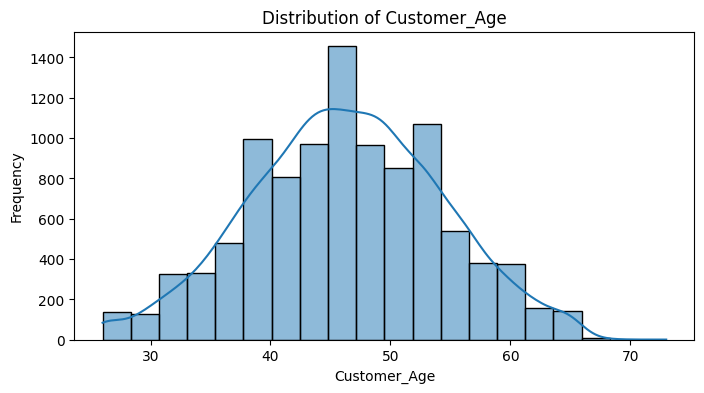

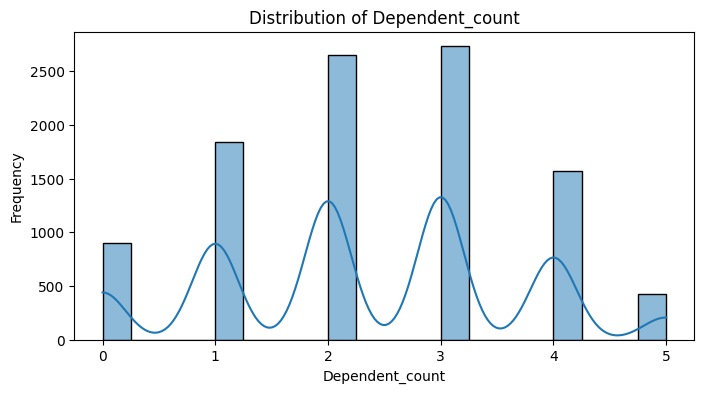

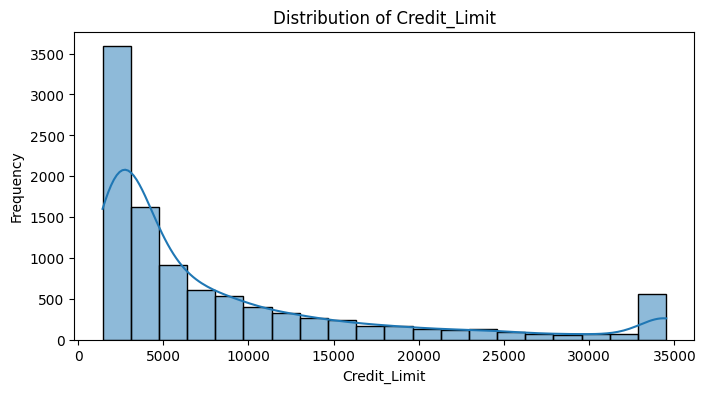

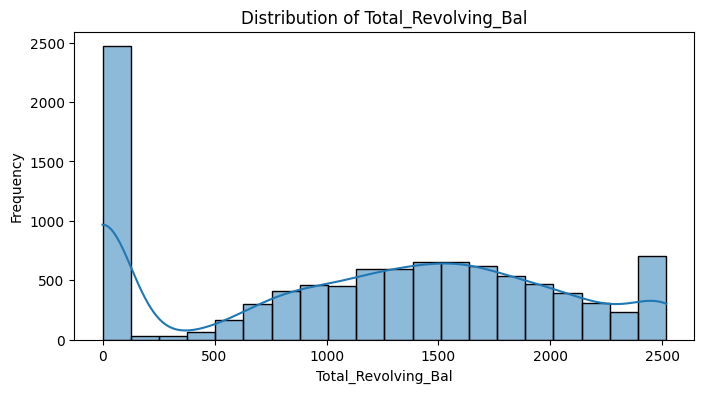

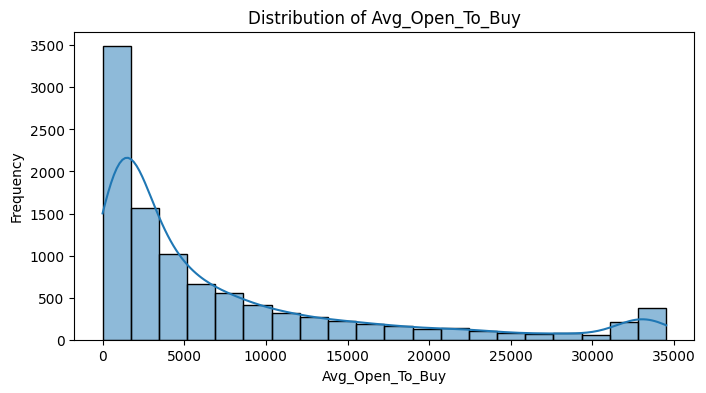

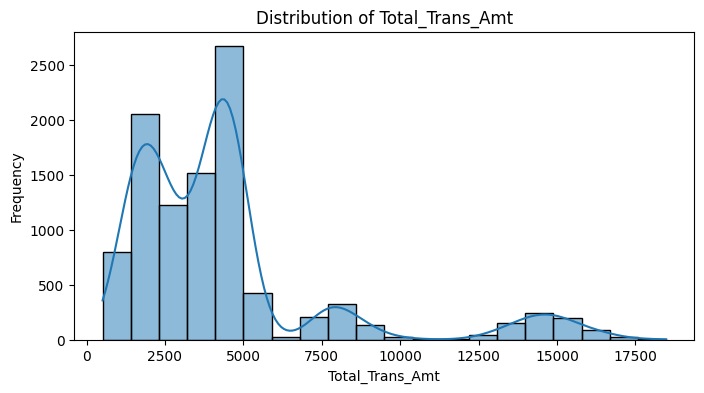

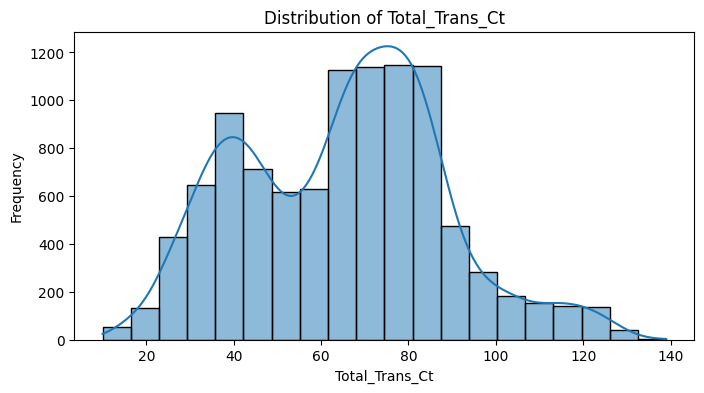

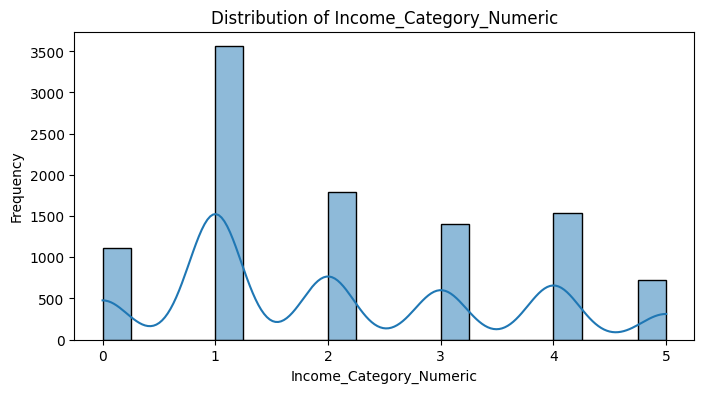

In [ ]:
#draw histogram of main columns
cols = [
    "Customer_Age", "Dependent_count", "Credit_Limit",
    "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Trans_Amt", "Total_Trans_Ct", "Income_Category_Numeric"
]
for column in cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

**Insights**

1. Customer_Age: Customers are mostly middle-aged (40-50), representing the working-age group with consistent financial activity.
2. Dependent_count: Most have 0-3 dependents, indicating smaller households dominate the dataset.
3. Credit_Limit: Majority have low credit limits (<10000), with a few VIPs (>30000) as outliers.
4. Total_Revolving_Bal: Balances are generally low (<2000), with a few high-value exceptions.
5. Avg_Open_To_Buy: Most customers have moderate available credit (<10000), showing limited reliance on credit cards.
6. Total_Trans_Amt: Transactions are generally low (<5000), with a few high spenders as outliers.
7. Total_Trans_Ct: Customers typically make 50-100 transactions, reflecting moderate service engagement.
8. Income_Category_Numeric: Predominantly lower to middle-income customers, suitable for mass-market products.



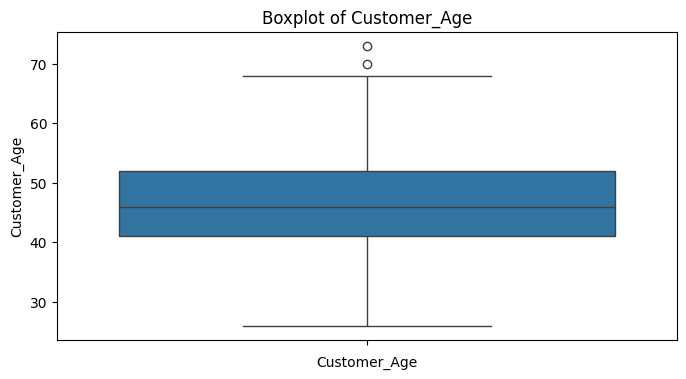

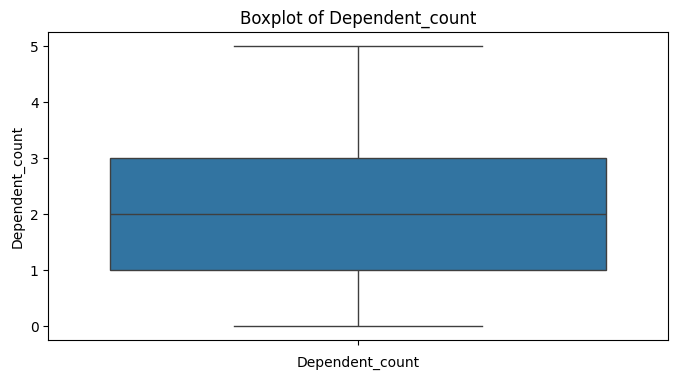

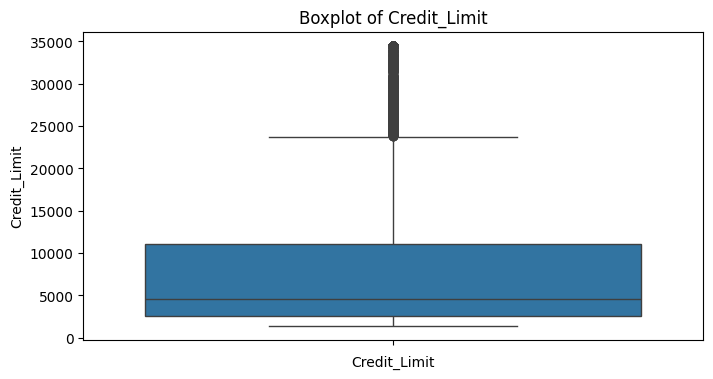

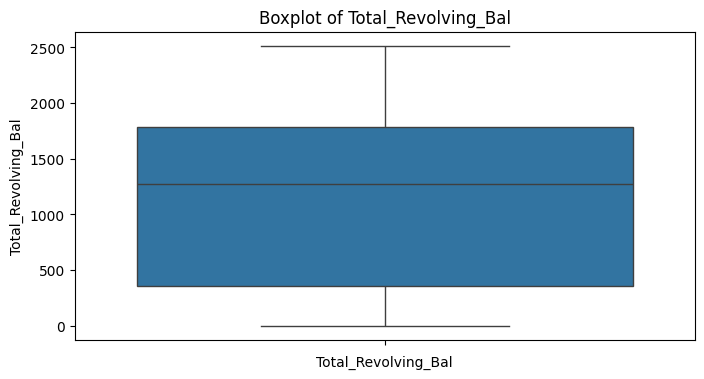

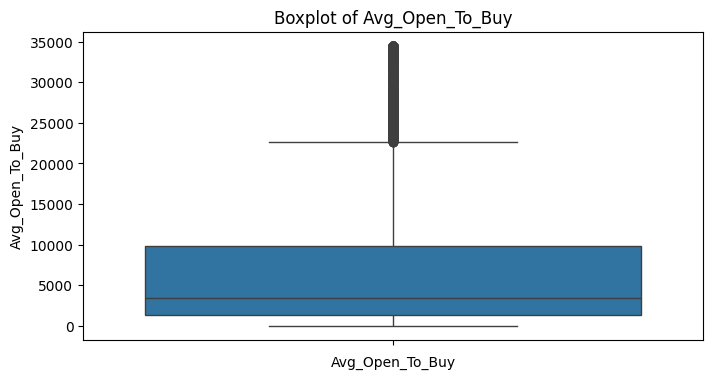

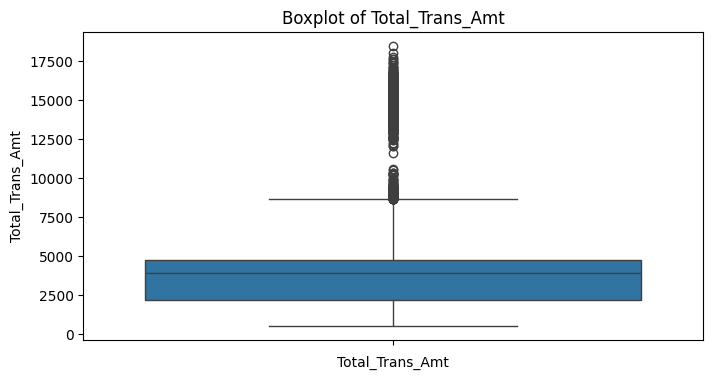

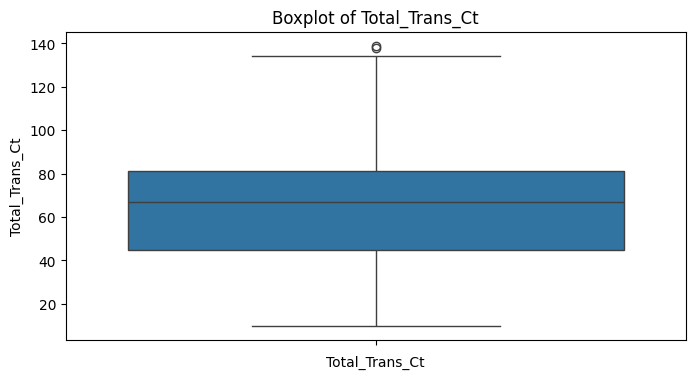

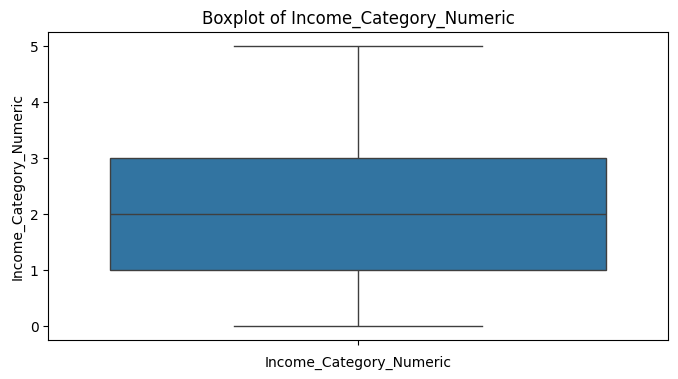

In [ ]:
#boxplot
for column in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

**Insights**
1. Customer_Age: No significant outliers; the age range is concentrated around middle-aged customers (40-50 years).

2. Dependent_count: Few outliers for higher numbers of dependents (>4), most customers have 0-3 dependents.

3. Credit_Limit: Significant outliers at very high credit limits (>30000), indicating a few VIP customers.

4. Total_Revolving_Bal: Outliers exist for balances close to the maximum limit, but most customers have modest balances.

5. Avg_Open_To_Buy: A few extreme outliers with very high available credit (>3,000), while most stay under 10000.

6. Total_Trans_Amt: Outliers with large transaction amounts, but most customers transact moderately (<5000).

7. Total_Trans_Ct: Some outliers with a very high number of transactions (>100), but most are within average usage.

8. Income_Category_Numeric: No outliers; income levels are evenly distributed with a slight skew toward lower-income groups.

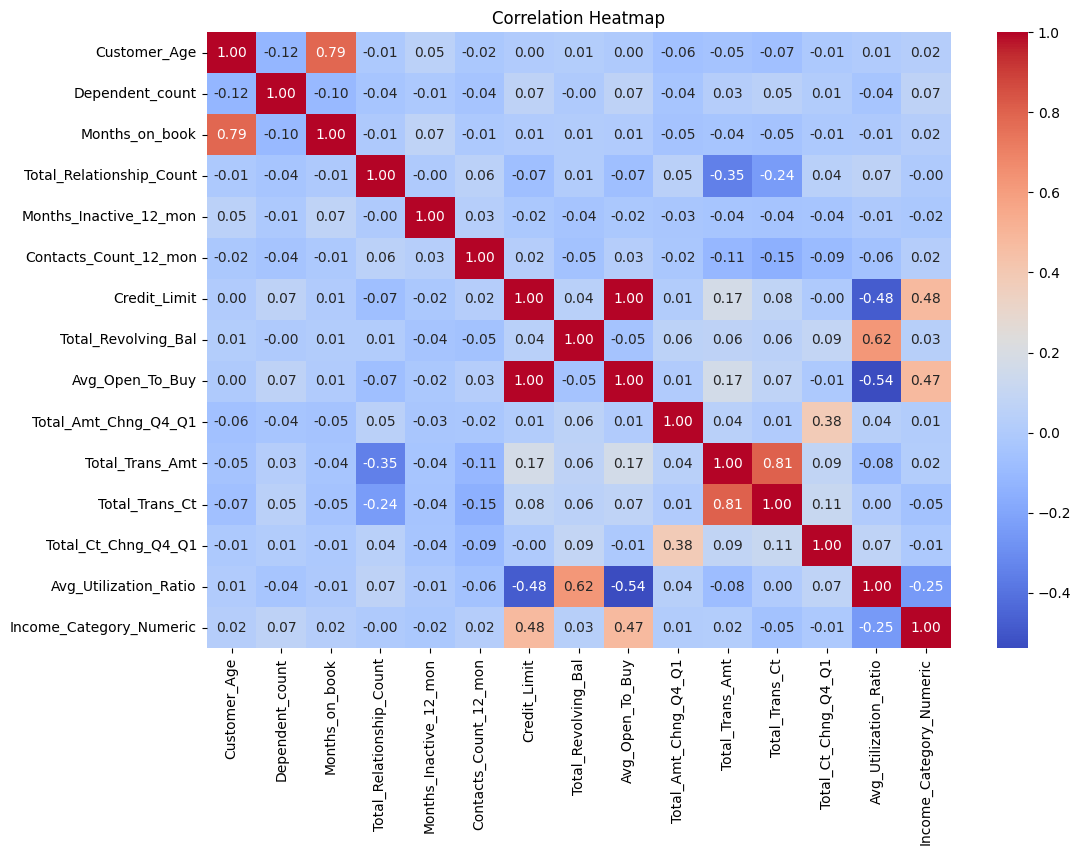

In [ ]:
#colerrelation heatmap
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

<Figure size 5000x5000 with 0 Axes>

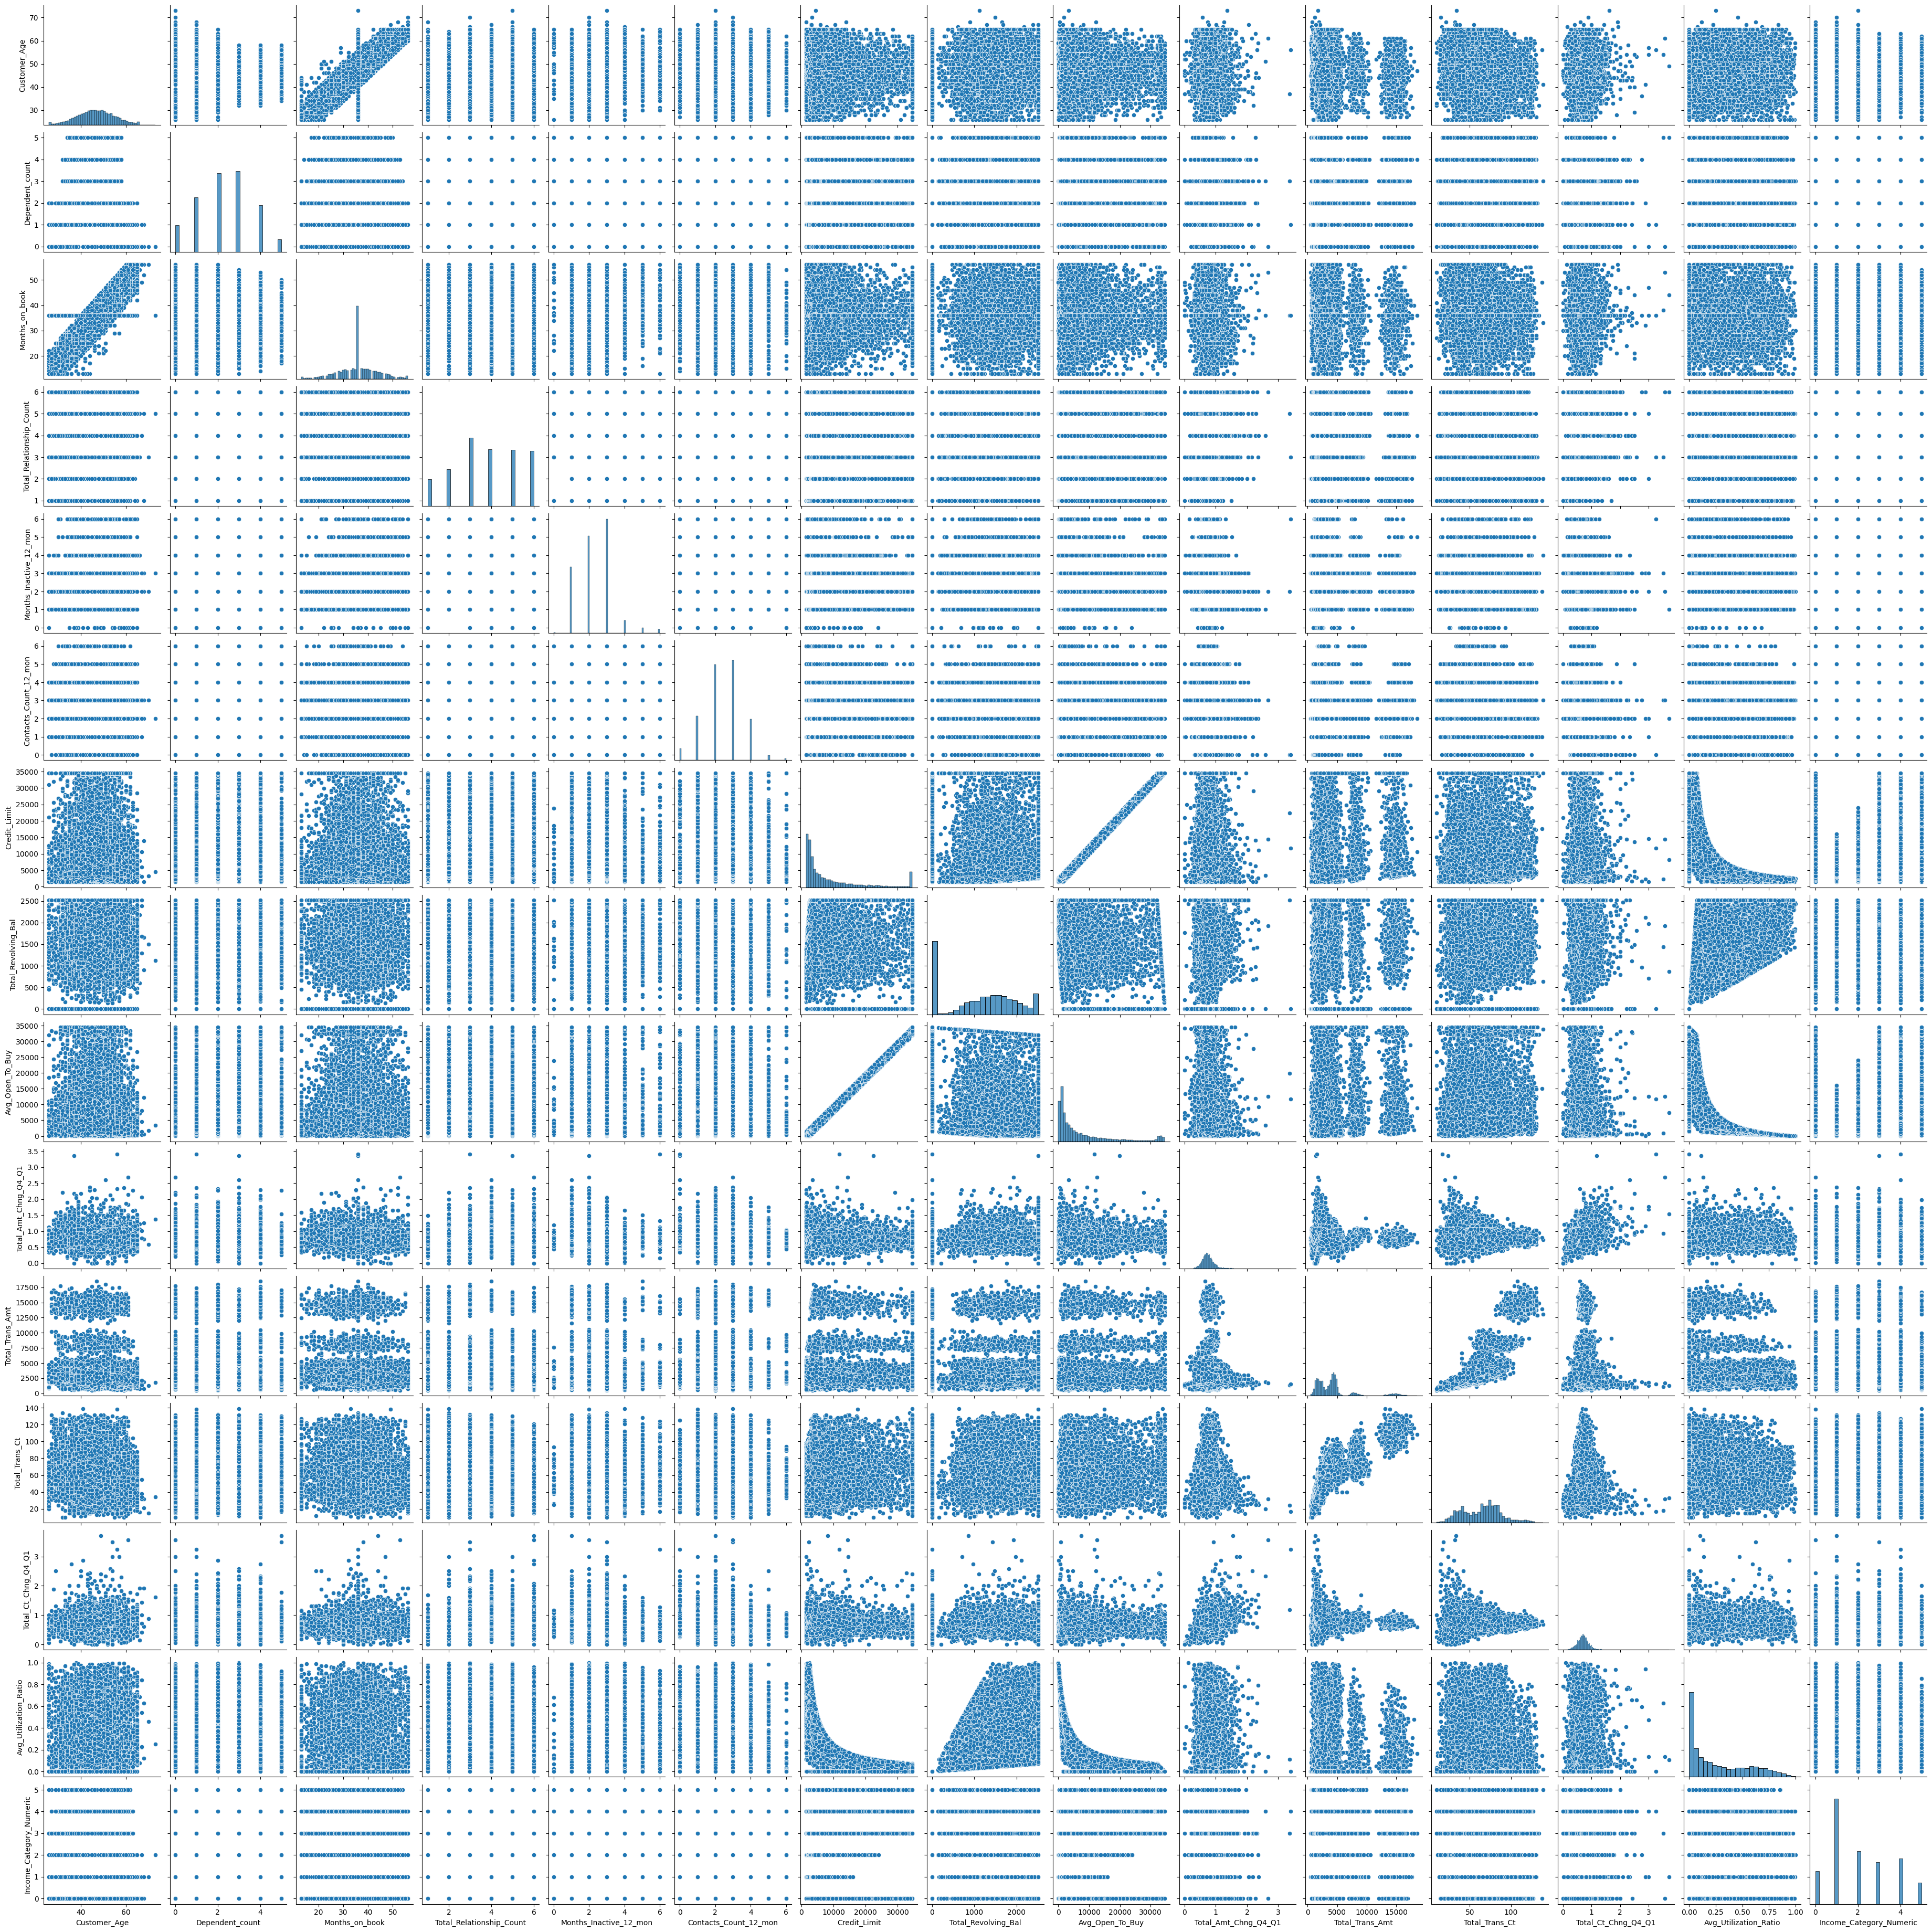

In [ ]:
fig = plt.figure(figsize=(50, 50))
sns.pairplot(df)
fig.show()

##Describe preprocessing pipeline

In [94]:
#check object types
df.describe(exclude=np.number)

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [95]:
#this step for checking unique values of each object types that i need to encode
#Attrition_Flag
Attrition_Flag_count = df['Attrition_Flag'].unique()
print(f"Total Attrition_Flag values: {Attrition_Flag_count}")
#Gender
Gender_count = df['Gender'].unique()
print(f"Total Gender values: {Gender_count}")
#Education_Level
Education_Level_count = df['Education_Level'].unique()
print(f"Total Education_Level values: {Education_Level_count}")
#Marital_Status
Marital_Status_count = df['Marital_Status'].unique()
print(f"Total Marital_Status values: {Marital_Status_count}")
#Income_Category
Income_Category_count = df['Income_Category'].unique()
print(f"Total Income_Category values: {Income_Category_count}")
#Card_Category
Card_Category_count = df['Card_Category'].unique()
print(f"Total Attrition_Flag values: {Card_Category_count}")

Total Attrition_Flag values: ['Existing Customer' 'Attrited Customer']
Total Gender values: ['M' 'F']
Total Education_Level values: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Total Marital_Status values: ['Married' 'Single' 'Unknown' 'Divorced']
Total Income_Category values: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Total Attrition_Flag values: ['Blue' 'Gold' 'Silver' 'Platinum']


In [96]:
#initialize the scaler
scaler = MinMaxScaler()

#select only numerical features for scaling
numerical_features = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_features]

#fit and transform the numerical data
scaled_data = scaler.fit_transform(numerical_df)

#convert back to a dataset
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features, index=numerical_df.index)
scaled_df

Customer_Age  Dependent_count  Months_on_book  \
0          0.404255              0.6        0.604651   
1          0.489362              1.0        0.720930   
2          0.531915              0.6        0.534884   
3          0.297872              0.8        0.488372   
4          0.297872              0.6        0.186047   
...             ...              ...             ...   
10122      0.510638              0.4        0.627907   
10123      0.319149              0.4        0.279070   
10124      0.382979              0.2        0.534884   
10125      0.085106              0.4        0.534884   
10126      0.361702              0.4        0.279070   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                           0.8                0.166667   
1                           1.0                0.166667   
2                           0.6                0.166667   
3                           0.4                0.666667   
4                           0.8                0.166667   
...                         ...                     ...   
10122                       0.4                0.333333   
10123                       0.6                0.333333   
10124                       0.8                0.500000   
10125                       0.6                0.500000   
10126                       1.0                0.333333   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.500000      0.340190             0.308701   
1                   0.333333      0.206112             0.343266   
2                   0.000000      0.059850             0.000000   
3                   0.166667      0.056676             1.000000   
4                   0.000000      0.099091             0.000000   
...                      ...           ...                  ...   
10122               0.500000      0.077536             0.735399   
10123               0.500000      0.085819             0.868494   
10124               0.666667      0.120042             0.000000   
10125               0.500000      0.116172             0.000000   
10126               0.666667      0.270566             0.779102   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             0.345116              0.392994         0.035273        0.248062   
1             0.214093              0.453636         0.043452        0.178295   
2             0.098948              0.763615         0.076611        0.077519   
3             0.022977              0.413600         0.036775        0.077519   
4             0.136557              0.640271         0.017025        0.139535   
...                ...                   ...              ...             ...   
10122         0.062266              0.206947         0.832647        0.829457   
10123         0.060499              0.236679         0.459219        0.457364   
10124         0.156637              0.241095         0.544175        0.387597   
10125         0.152928              0.157492         0.438689        0.403101   
10126         0.244082              0.206947         0.544342        0.395349   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Income_Category_Numeric  
0                 0.437534               0.061061                      0.6  
1                 1.000000               0.105105                      0.2  
2                 0.628164               0.000000                      0.8  
3                 0.628164               0.760761                      0.2  
4                 0.673129               0.000000                      0.6  
...                    ...                    ...                      ...  
10122             0.230749               0.462462                      0.4  
10123             0.183899               0.511512                      0.4  
10124             0.220248               0.000000                      0.2  
10125             0.194400               0.000000                      0.4  


In [97]:
#handle object types by using OrdinalEncoder
Attrition_Flag_Categories = ['Existing Customer', 'Attrited Customer']
Gender_Categories = ['M', 'F']
Education_Level_Categories = ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Marital_Status_Categories = ['Married', 'Single', 'Unknown', 'Divorced']
Income_Category_Categories = ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']
Card_Category_Categories = ['Blue', 'Gold', 'Silver', 'Platinum']

#slipt it into 2 types of encoding
ordinal_columns = ['Education_Level', 'Income_Category']
onehot_columns = ['Gender', 'Marital_Status', 'Card_Category']

#ordinal encoding
ordinal_categories = [Education_Level_Categories, Income_Category_Categories]
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
df_ordinal_encoded = ordinal_encoder.fit_transform(df[ordinal_columns])
df_ordinal_encoded = pd.DataFrame(df_ordinal_encoded, columns=ordinal_columns, index=df.index)

#one-hot encoding
df_onehot_encoded = pd.get_dummies(df[onehot_columns], prefix=onehot_columns, drop_first=False)

#handling the target columns
mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
df_target = pd.DataFrame(df['Attrition_Flag'].map(mapping), columns=['Attrition_Flag'])

#concat 2 tables
encoded_df = pd.concat([df_ordinal_encoded, df_onehot_encoded, df_target], axis=1)
encoded_df

Education_Level  Income_Category  Gender_F  Gender_M  \
0                  0.0              0.0     False      True   
1                  1.0              1.0      True     False   
2                  1.0              2.0     False      True   
3                  0.0              1.0      True     False   
4                  2.0              0.0     False      True   
...                ...              ...       ...       ...   
10122              1.0              3.0     False      True   
10123              3.0              3.0     False      True   
10124              0.0              1.0      True     False   
10125              1.0              3.0     False      True   
10126              1.0              1.0      True     False   

       Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        False                    True                  False   
1                        False                   False                   True   
2                        False                    True                  False   
3                        False                   False                  False   
4                        False                    True                  False   
...                        ...                     ...                    ...   
10122                    False                   False                   True   
10123                     True                   False                  False   
10124                    False                    True                  False   
10125                    False                   False                  False   
10126                    False                    True                  False   

       Marital_Status_Unknown  Card_Category_Blue  Card_Category_Gold  \
0                       False                True               False   
1                       False                True               False   
2                       False                True               False   
3                        True                True               False   
4                       False                True               False   
...                       ...                 ...                 ...   
10122                   False                True               False   
10123                   False                True               False   
10124                   False                True               False   
10125                    True                True               False   
10126                   False               False               False   

       Card_Category_Platinum  Card_Category_Silver  Attrition_Flag  
0                       False                 False               0  
1                       False                 False               0  
2                       False                 False               0  
3                       False                 False               0  
4                       False                 False               0  
...                       ...                   ...             ...  
10122                   False                 False               0  
10123                   False                 False               1  
10124                   False                 False               1  
10125                   False                 False               1  
10126                   False                  True               1  

[10127 rows x 13 columns]

In [98]:
#combine 2 df
data = pd.concat([scaled_df, encoded_df], axis=1)

In [99]:
#check data
data.tail(10)

Customer_Age  Dependent_count  Months_on_book  \
10117      0.659574              0.4        0.627907   
10118      0.510638              0.2        0.534884   
10119      0.617021              0.6        0.790698   
10120      0.595745              0.2        0.488372   
10121      0.638298              0.2        0.860465   
10122      0.510638              0.4        0.627907   
10123      0.319149              0.4        0.279070   
10124      0.382979              0.2        0.534884   
10125      0.085106              0.4        0.534884   
10126      0.361702              0.4        0.279070   

       Total_Relationship_Count  Months_Inactive_12_mon  \
10117                       1.0                0.500000   
10118                       1.0                0.500000   
10119                       0.6                0.500000   
10120                       0.8                0.333333   
10121                       0.6                0.166667   
10122                       0.4                0.333333   
10123                       0.6                0.333333   
10124                       0.8                0.500000   
10125                       0.6                0.500000   
10126                       1.0                0.333333   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10117               0.666667      0.498423             0.758443   
10118               0.666667      0.257597             0.378228   
10119               0.500000      0.399626             1.000000   
10120               0.000000      0.377949             0.837902   
10121               0.666667      0.068013             0.240763   
10122               0.500000      0.077536             0.735399   
10123               0.500000      0.085819             0.868494   
10124               0.666667      0.120042             0.000000   
10125               0.500000      0.116172             0.000000   
10126               0.666667      0.270566             0.779102   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10117         0.463970              0.209597         0.945143        0.782946   
10118         0.260887              0.242861         0.545232        0.410853   
10119         0.351665              0.048867         0.305942        0.333333   
10120         0.342711              0.194289         0.838266        0.806202   
10121         0.089213              0.167795         0.783688        0.852713   
10122         0.062266              0.206947         0.832647        0.829457   
10123         0.060499              0.236679         0.459219        0.457364   
10124         0.156637              0.241095         0.544175        0.387597   
10125         0.152928              0.157492         0.438689        0.403101   
10126         0.244082              0.206947         0.544342        0.395349   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Income_Category_Numeric  \
10117             0.220786               0.106106                      0.8   
10118             0.296177               0.096096                      0.8   
10119             0.138395               0.172172                      0.0   
10120             0.203016               0.151151                      0.6   
10121             0.212978               0.164164                      0.2   
10122             0.230749               0.462462                      0.4   
10123             0.183899               0.511512                      0.4   
10124             0.220248               0.000000                      0.2   
10125             0.194400               0.000000                      0.4   
10126             0.174744               0.189189                      0.2   

       Education_Level  Income_Category  Gender_F  Gender_M  \
10117              1.0              2.0     False      True   
10118              3.0              2.0     False      True   
10119              2.0              5.0      True     False   

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  float64
 1   Dependent_count           10127 non-null  float64
 2   Months_on_book            10127 non-null  float64
 3   Total_Relationship_Count  10127 non-null  float64
 4   Months_Inactive_12_mon    10127 non-null  float64
 5   Contacts_Count_12_mon     10127 non-null  float64
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  float64
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  float64
 11  Total_Trans_Ct            10127 non-null  float64
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
 14  Income

##Performance metrics and use 3 classification algorithms

In [101]:
y = data['Attrition_Flag']
X = data.drop('Attrition_Flag',errors='ignore',axis=1)
X.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0      0.404255              0.6        0.604651                       0.8   
1      0.489362              1.0        0.720930                       1.0   
2      0.531915              0.6        0.534884                       0.6   
3      0.297872              0.8        0.488372                       0.4   
4      0.297872              0.6        0.186047                       0.8   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                0.166667               0.500000      0.340190   
1                0.166667               0.333333      0.206112   
2                0.166667               0.000000      0.059850   
3                0.666667               0.166667      0.056676   
4                0.166667               0.000000      0.099091   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0             0.308701         0.345116              0.392994   
1             0.343266         0.214093              0.453636   
2             0.000000         0.098948              0.763615   
3             1.000000         0.022977              0.413600   
4             0.000000         0.136557              0.640271   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0         0.035273        0.248062             0.437534   
1         0.043452        0.178295             1.000000   
2         0.076611        0.077519             0.628164   
3         0.036775        0.077519             0.628164   
4         0.017025        0.139535             0.673129   

   Avg_Utilization_Ratio  Income_Category_Numeric  Education_Level  \
0               0.061061                      0.6              0.0   
1               0.105105                      0.2              1.0   
2               0.000000                      0.8              1.0   
3               0.760761                      0.2              0.0   
4               0.000000                      0.6              2.0   

   Income_Category  Gender_F  Gender_M  Marital_Status_Divorced  \
0              0.0     False      True                    False   
1              1.0      True     False                    False   
2              2.0     False      True                    False   
3              1.0      True     False                    False   
4              0.0     False      True                    False   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  \
0                    True                  False                   False   
1                   False                   True                   False   
2                    True                  False                   False   
3                   False                  False                    True   
4                    True                  False                   False   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                True               False                   False   
1                True               False                   False   
2                True               False                   False   
3                True               False                   False   
4                True               False                   False   

   Card_Category_Silver  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False

In [102]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  float64
 1   Dependent_count           10127 non-null  float64
 2   Months_on_book            10127 non-null  float64
 3   Total_Relationship_Count  10127 non-null  float64
 4   Months_Inactive_12_mon    10127 non-null  float64
 5   Contacts_Count_12_mon     10127 non-null  float64
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  float64
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  float64
 11  Total_Trans_Ct            10127 non-null  float64
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
 14  Income

In [103]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [104]:
y.tail(10)

10117    0
10118    1
10119    1
10120    0
10121    0
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, dtype: int64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 27), (2026, 27), (8101,), (2026,))

In [106]:
#check balancy
y_train.value_counts()

Attrition_Flag
0    6803
1    1298
Name: count, dtype: int64

In [107]:
y.value_counts(normalize=True)

Attrition_Flag
0    0.83934
1    0.16066
Name: proportion, dtype: float64

=> Because it is ~84% and ~16% then data is imbalanced

In [108]:
#handle imbalanced
sm = SMOTE(random_state=13)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [109]:
y_train.value_counts()

Attrition_Flag
0    6803
1    6803
Name: count, dtype: int64

=> now the data is balanced

###Decision tree

In [110]:
clf1 = DecisionTreeClassifier()

In [111]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier()

In [112]:
y_pred = clf1.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

<Axes: >

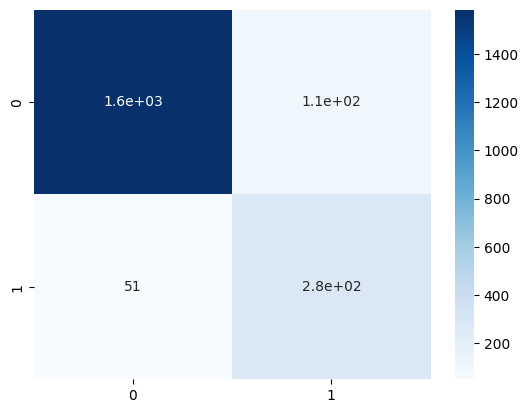

In [113]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

In [114]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(1583, 114, 51, 278)

In [115]:
decisionTreeAcc = accuracy_score(y_test, y_pred)
decisionTreePre = precision_score(y_test, y_pred)
decisionTreeRecall = recall_score(y_test, y_pred)
decisionTreeF1 = f1_score(y_test, y_pred)
print("Accuracy: " + str(decisionTreeAcc) + "\nPrecision: " + str(decisionTreePre) + "\nRecall: " + str(decisionTreeRecall) + "\nF1-Score: " + str(decisionTreeF1))

Accuracy: 0.918558736426456
Precision: 0.7091836734693877
Recall: 0.8449848024316109
F1-Score: 0.7711511789181692


###Random Forest

In [116]:
clf2 = RandomForestClassifier()

In [117]:
clf2.fit(X_train, y_train)

RandomForestClassifier()

In [118]:
y_pred = clf2.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

<Axes: >

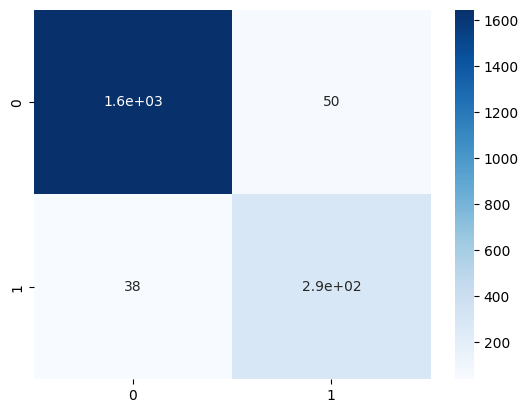

In [119]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

In [120]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(1647, 50, 38, 291)

In [121]:
radAcc = accuracy_score(y_test, y_pred)
radPre = precision_score(y_test, y_pred)
radRecall = recall_score(y_test, y_pred)
radF1 = f1_score(y_test, y_pred)
print("Accuracy: " + str(radAcc) + "\nPrecision: " + str(radPre) + "\nRecall: " + str(radRecall) + "\nF1-Score: " + str(radF1))

Accuracy: 0.9565646594274433
Precision: 0.8533724340175953
Recall: 0.8844984802431611
F1-Score: 0.8686567164179104


###AdaBoost

In [122]:
clf3 = AdaBoostClassifier()

In [123]:
clf3.fit(X_train, y_train)

AdaBoostClassifier()

In [124]:
y_pred = clf3.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

<Axes: >

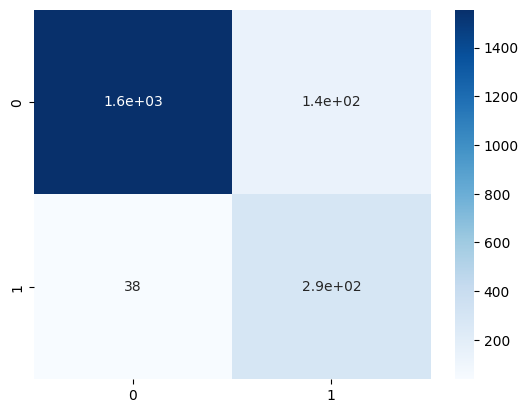

In [125]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

In [126]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(1556, 141, 38, 291)

In [127]:
adaAcc = accuracy_score(y_test, y_pred)
adaPre = precision_score(y_test, y_pred)
adaRecall = recall_score(y_test, y_pred)
adaF1 = f1_score(y_test, y_pred)
print("Accuracy: " + str(adaAcc) + "\nPrecision: " + str(adaPre) + "\nRecall: " + str(adaRecall) + "\nF1-Score: " + str(adaF1))

Accuracy: 0.9116485686080947
Precision: 0.6736111111111112
Recall: 0.8844984802431611
F1-Score: 0.7647831800262812


###Summary Table

In [128]:
results = {
    "Model": ["Decision Tree", "Random Forest", "AdaBoost"],
    "Accuracy": [decisionTreeAcc, radAcc, adaAcc],
    "Precision": [decisionTreePre, radPre, adaPre],
    "Recall": [decisionTreeRecall, radRecall, adaRecall],
    "F1-Score": [decisionTreeF1, radF1, adaF1]
}

results_df = pd.DataFrame(results)
results_df

Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.918559   0.709184  0.844985  0.771151
1  Random Forest  0.956565   0.853372  0.884498  0.868657
2       AdaBoost  0.911649   0.673611  0.884498  0.764783

**Insights**

1. Decision Tree: Accuracy of the Decision Tree performs decently (91.86%), Precision (0.7135) and Recall (0.8328) are balanced but lower than Random Forest. The F1-Score (0.7664) reflects that the Decision Tree has a good balance but still lower than Random Forest.
2. Random Forest:  Random Forest achieves the highest accuracy (95.71%) compared to Decision Tree (91.86%) and AdaBoost (91.16%). Random Forest also has the highest F1-Score (0.8684), indicating a good balance between Precision (0.8645) and Recall (0.8723).
3. AdaBoost: AdaBoost performs slightly better than Decision Tree in Recall (0.8845 vs. 0.8328) but has lower Precision (0.6736) and F1-Score (0.7648), its overall Accuracy (91.16%) is also lower than Random Forest.

=> Random Forest is the best classification algorithm among the three, showing the highest Accuracy (95.71%) and F1-Score (0.8684) after handling the imbalance in the dataset and in my point of view, **F1-Score** is the most important metric because it balances Precision and Recall which helps minimizze both false negatives and positives.

##k-Fold cross validation

###Stratified version with k = 5

In [141]:
#using back models which are Decision Tree, Random Forest, AdaBoost, and set all random state = 13
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=13),
    'Random Forest': RandomForestClassifier(random_state=13),
    'AdaBoost': AdaBoostClassifier(random_state=13)
}
#Initialize k = 5
k = 5

#List to store result for all metrics of each model
results = {}

#using stratified version
skf = StratifiedKFold(n_splits=k)

for model_name, model in models.items():
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    results[model_name] = {
        'Accuracy': np.mean(accuracy_scores),
        'Precision': np.mean(precision_scores),
        'Recall': np.mean(recall_scores),
        'F1-Score': np.mean(f1_scores)
    }

#the table:
fold_df = pd.DataFrame(results).T
fold_df

Accuracy  Precision    Recall  F1-Score
Decision Tree  0.895139   0.721454  0.644008  0.634420
Random Forest  0.924558   0.867241  0.652534  0.685226
AdaBoost       0.907873   0.818130  0.600304  0.629292

**Insights**

1. Decision Tree: Accuracy (89.51%), Precision (0.7215), Recall (0.6440) and F1-Score (0.6344), comparing with others, decision tree has an overall okay, however, the Recall is a bit low.
2. Random Forest: Accuracy (92.46%), Precision (0.8672), Recall (0.6525) and F1-Score (0.6852). Random Forest the the algorithm that has the highest accuracy and F1-Score which means it balances well between Precision and Recall.
3. AdaBoost: Accuracy (90.79%), Precision (0.8181), Recall (0.6003) and F1-Score (0.6293). AdaBoost shows that it performs better in Precision than Decision Tree but same with Decision Tree in Recall.

=> Random Forest is the best algorithm with Accuracy (92.46%) and F1-Score (0.6852).


**Reason why i am using stratified version**
- Because this dataset is imbalanced which has ~84% and ~16%. Then stratified version is suitable for this dataset. Stratified version ensures that each fold maintains the same class distribution as the overall dataset, making it more suitable for evaluating this imbalanced dataset.

###15 experiments:

In [152]:
experiments = [
    #Decision Tree
    {'Algorithm': 'Decision Tree', 'Model': DecisionTreeClassifier(random_state=13), 'Params': {'max_depth': 5, 'min_samples_split': 2}},
    {'Algorithm': 'Decision Tree', 'Model': DecisionTreeClassifier(random_state=13), 'Params': {'max_depth': 10, 'min_samples_split': 2}},
    {'Algorithm': 'Decision Tree', 'Model': DecisionTreeClassifier(random_state=13), 'Params': {'max_depth': None, 'min_samples_split': 2}},
    {'Algorithm': 'Decision Tree', 'Model': DecisionTreeClassifier(random_state=13), 'Params': {'max_depth': 10, 'min_samples_split': 5}},
    {'Algorithm': 'Decision Tree', 'Model': DecisionTreeClassifier(random_state=13), 'Params': {'max_depth': 5, 'min_samples_split': 10}},
]

results = []
skf = StratifiedKFold(n_splits=k)

for exp in experiments:
    model = exp['Model'].set_params(**exp['Params'])
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    start_time = time.time()

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        elapsed_time = time.time() - start_time

    results.append({
        'Algorithm': exp['Algorithm'],
        'Parameters': exp['Params'],
        'Accuracy': np.mean(accuracy_scores),
        'Precision': np.mean(precision_scores),
        'Recall': np.mean(recall_scores),
        'F1-Score': np.mean(f1_scores),
        'Time (s)': elapsed_time
    })

#the table:
DTexp_df = pd.DataFrame(results)
DTexp_df

Algorithm                                   Parameters  Accuracy  \
0  Decision Tree     {'max_depth': 5, 'min_samples_split': 2}  0.895334   
1  Decision Tree    {'max_depth': 10, 'min_samples_split': 2}  0.896224   
2  Decision Tree  {'max_depth': None, 'min_samples_split': 2}  0.895139   
3  Decision Tree    {'max_depth': 10, 'min_samples_split': 5}  0.897113   
4  Decision Tree    {'max_depth': 5, 'min_samples_split': 10}  0.895334   

   Precision    Recall  F1-Score  Time (s)  
0   0.779461  0.597216  0.633059  0.940475  
1   0.737037  0.616330  0.628093  0.677226  
2   0.721454  0.644008  0.634420  0.778449  
3   0.745574  0.620623  0.632401  0.715223  
4   0.779461  0.597216  0.633059  0.697675

**Parameters explainations**
- Decision Tree:
  + max_depth: Maximum depth of the tree, the larger the number, the more the tree can learn complex patterns which means we can increase Recall values. However, if the depth is too large, the model do not generalize the data well (overfitting).
  + min_samples_split: Minimum samples to split a node, this controls the minimum number of samples required to split a decision node. The larger values, the lower chances to have overfitting becasue it splits on small subsets of data. However it can decrease Recall values.
  + Experiments:
    + In the experiment number 2 (max_depth=None): Recall increased to 0.6440 due to unrestricted depth, but overall performance (F1-Score: 0.6344) did not improve significantly because of overfitting.
    + In the last experiment (min_samples_split=10): The tree had at least 10 samples to split, reducing overfitting and getting Accuracy (89.53%) and F1-Score (0.6331), at the cost of slightly lower Recall (0.5972).

In [153]:
experiments = [
    #Random Forest
    {'Algorithm': 'Random Forest', 'Model': RandomForestClassifier(random_state=13), 'Params': {'n_estimators': 50, 'max_depth': 10}},
    {'Algorithm': 'Random Forest', 'Model': RandomForestClassifier(random_state=13), 'Params': {'n_estimators': 100, 'max_depth': 10}},
    {'Algorithm': 'Random Forest', 'Model': RandomForestClassifier(random_state=13), 'Params': {'n_estimators': 200, 'max_depth': 10}},
    {'Algorithm': 'Random Forest', 'Model': RandomForestClassifier(random_state=13), 'Params': {'n_estimators': 100, 'max_depth': None}},
    {'Algorithm': 'Random Forest', 'Model': RandomForestClassifier(random_state=13), 'Params': {'n_estimators': 100, 'max_depth': 5}},
]

results = []
skf = StratifiedKFold(n_splits=k)

for exp in experiments:
    model = exp['Model'].set_params(**exp['Params'])
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    start_time = time.time()

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        elapsed_time = time.time() - start_time


    results.append({
        'Algorithm': exp['Algorithm'],
        'Parameters': exp['Params'],
        'Accuracy': np.mean(accuracy_scores),
        'Precision': np.mean(precision_scores),
        'Recall': np.mean(recall_scores),
        'F1-Score': np.mean(f1_scores),
        'Time (s)': elapsed_time
    })

#the table:
RFexp_df = pd.DataFrame(results)
RFexp_df

Algorithm                                Parameters  Accuracy  \
0  Random Forest     {'n_estimators': 50, 'max_depth': 10}  0.921497   
1  Random Forest    {'n_estimators': 100, 'max_depth': 10}  0.918831   
2  Random Forest    {'n_estimators': 200, 'max_depth': 10}  0.918337   
3  Random Forest  {'n_estimators': 100, 'max_depth': None}  0.924558   
4  Random Forest     {'n_estimators': 100, 'max_depth': 5}  0.901057   

   Precision    Recall  F1-Score   Time (s)  
0   0.875044  0.626709  0.673574   6.161129  
1   0.868730  0.616249  0.662290  10.764962  
2   0.866022  0.619322  0.663013  24.265085  
3   0.867241  0.652534  0.685226   8.711245  
4   0.867005  0.521580  0.590996   4.060363

**Parameters explainations**
- Random Forest:
  + n_estimators: The size of the tree, this specifies the number of decision trees in the ensemble. more trees generally improve Precision and F1-Score by reducing the model’s variance. Too few trees can result in underfitting, where the model fails to capture complex patterns.
  + max_depth: Controls the maximum depth of each decision tree in the forest, large max_depth can help the tree to learn more complex patterns, increasing Recall. However, it also can cause overfitting. Using small max_depth may be okay in preventing overfitting but may decrease Recall.
  + Experiments:
    + Experiment 3 (n_estimators=100, max_depth=None): Had the highest Accuracy (92.45%) and F1-Score (0.6852) by balancing Precision and Recall.The unrestricted depth allowed the trees to capture complex patterns, improving general performance.
    + Experiment 2 (n_estimators=200, max_depth=10): Training took 24.27 seconds due to the high number of trees (n_estimators=200), while adding more trees improved model stability, the restricted tree depth (max_depth=10) slightly limited Recall compared to Experiment 3.

In [154]:
experiments = [
    #AdaBoost
    {'Algorithm': 'AdaBoost', 'Model': AdaBoostClassifier(random_state=13), 'Params': {'n_estimators': 50, 'learning_rate': 0.5}},
    {'Algorithm': 'AdaBoost', 'Model': AdaBoostClassifier(random_state=13), 'Params': {'n_estimators': 100, 'learning_rate': 0.5}},
    {'Algorithm': 'AdaBoost', 'Model': AdaBoostClassifier(random_state=13), 'Params': {'n_estimators': 200, 'learning_rate': 0.5}},
    {'Algorithm': 'AdaBoost', 'Model': AdaBoostClassifier(random_state=13), 'Params': {'n_estimators': 300, 'learning_rate': 0.5}},
    {'Algorithm': 'AdaBoost', 'Model': AdaBoostClassifier(random_state=13), 'Params': {'n_estimators': 100, 'learning_rate': 1.0}},
]

results = []
skf = StratifiedKFold(n_splits=k)

for exp in experiments:
    model = exp['Model'].set_params(**exp['Params'])
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    start_time = time.time()

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        elapsed_time = time.time() - start_time

    results.append({
        'Algorithm': exp['Algorithm'],
        'Parameters': exp['Params'],
        'Accuracy': np.mean(accuracy_scores),
        'Precision': np.mean(precision_scores),
        'Recall': np.mean(recall_scores),
        'F1-Score': np.mean(f1_scores),
        'Time (s)': elapsed_time
    })

#the table:
ABexp_df = pd.DataFrame(results)
ABexp_df

Algorithm                                   Parameters  Accuracy  Precision  \
0  AdaBoost   {'n_estimators': 50, 'learning_rate': 0.5}  0.890986   0.799705   
1  AdaBoost  {'n_estimators': 100, 'learning_rate': 0.5}  0.901848   0.815901   
2  AdaBoost  {'n_estimators': 200, 'learning_rate': 0.5}  0.909451   0.820955   
3  AdaBoost  {'n_estimators': 300, 'learning_rate': 0.5}  0.913698   0.828244   
4  AdaBoost  {'n_estimators': 100, 'learning_rate': 1.0}  0.915574   0.828976   

     Recall  F1-Score   Time (s)  
0  0.492074  0.548163   3.237032  
1  0.547402  0.595232   7.427439  
2  0.573882  0.619312  13.631208  
3  0.599105  0.637148  20.208327  
4  0.627974  0.651441   7.418201

**Parameters explainations**
- AdaBoost:
  + n_estimators: The number of weak learners, increasing n_estimators generally improves Recall and F1-Score by allowing the model to focus on harder-to-classify instances. However, a high number of estimators increases computation time, as seen in Experiment 3 and Experiment 4.
  + learning_rate:  Determines how much each weak learner contributes to the final ensemble. The smaller learning_rate, the better chances to reduce overfitting but it requires more loops. A larger learning_rate, increases the influence of individual weak learners but risks overfitting.
  + Experiments:
    + Experiment 0 (n_estimators=50, learning_rate=0.5): Had the lowest Accuracy (89.10%) and F1-Score (0.5482). The lower number of estimators limited the model's ability to learn complex patterns, leading to underfitting. However, training time was only 3.24 seconds, making it the fastest.
    + Experiment 3 (n_estimators=300, learning_rate=0.5): had a balance with Accuracy (91.36%), Precision (0.8282), Recall (0.5991), and F1-Score (0.6371). The increased number of estimators improved Recall and F1-Score but required 20.20 seconds.

In [156]:
_15Exp = pd.concat([DTexp_df, RFexp_df, ABexp_df])
_15Exp

Algorithm                                   Parameters  Accuracy  \
0  Decision Tree     {'max_depth': 5, 'min_samples_split': 2}  0.895334   
1  Decision Tree    {'max_depth': 10, 'min_samples_split': 2}  0.896224   
2  Decision Tree  {'max_depth': None, 'min_samples_split': 2}  0.895139   
3  Decision Tree    {'max_depth': 10, 'min_samples_split': 5}  0.897113   
4  Decision Tree    {'max_depth': 5, 'min_samples_split': 10}  0.895334   
0  Random Forest        {'n_estimators': 50, 'max_depth': 10}  0.921497   
1  Random Forest       {'n_estimators': 100, 'max_depth': 10}  0.918831   
2  Random Forest       {'n_estimators': 200, 'max_depth': 10}  0.918337   
3  Random Forest     {'n_estimators': 100, 'max_depth': None}  0.924558   
4  Random Forest        {'n_estimators': 100, 'max_depth': 5}  0.901057   
0       AdaBoost   {'n_estimators': 50, 'learning_rate': 0.5}  0.890986   
1       AdaBoost  {'n_estimators': 100, 'learning_rate': 0.5}  0.901848   
2       AdaBoost  {'n_estimators': 200, 'learning_rate': 0.5}  0.909451   
3       AdaBoost  {'n_estimators': 300, 'learning_rate': 0.5}  0.913698   
4       AdaBoost  {'n_estimators': 100, 'learning_rate': 1.0}  0.915574   

   Precision    Recall  F1-Score   Time (s)  
0   0.779461  0.597216  0.633059   0.940475  
1   0.737037  0.616330  0.628093   0.677226  
2   0.721454  0.644008  0.634420   0.778449  
3   0.745574  0.620623  0.632401   0.715223  
4   0.779461  0.597216  0.633059   0.697675  
0   0.875044  0.626709  0.673574   6.161129  
1   0.868730  0.616249  0.662290  10.764962  
2   0.866022  0.619322  0.663013  24.265085  
3   0.867241  0.652534  0.685226   8.711245  
4   0.867005  0.521580  0.590996   4.060363  
0   0.799705  0.492074  0.548163   3.237032  
1   0.815901  0.547402  0.595232   7.427439  
2   0.820955  0.573882  0.619312  13.631208  
3   0.828244  0.599105  0.637148  20.208327  
4   0.828976  0.627974  0.651441   7.418201

**insights**

1. Decision Tree: Accuracy (~89.5%) and F1-Score (~0.63) are low, with very low Recall, but it trains very fast (~0.7-0.9 seconds).
2. Random Forest: Best model with n_estimators=100 and max_depth=None, achieving Accuracy (92.45%), F1-Score (0.6852), and balanced Precision (0.8672) and Recall (0.6525). Training time is reasonable (~8.71 seconds).
3. AdaBoost: Performs well with n_estimators=100 and learning_rate=1.0, achieving Accuracy (91.56%), higher Precision (0.8289), but lower Recall (0.6279) and F1-Score (0.6514). Training time (~7.42 seconds) is slightly faster than Random Forest.

=> Random Forest is the best model due to has the highest Accuracy and F1-Score.

##Project Summarize Insights

The project focuses on classifying customer attrition using a dataset with imbalanced classes (~84% "Existing Customers" and ~16% "Attrited Customers").

In preprocessing part, I used 3 methods to encoding the data:
- Using Ordinal Encoding for ordered categorical like Education_Level and Income_Category
- Using One-Hot Encoding for nominal categorical like Gender, Marital_Status, and Card_Category
- Using MinMAxScaler for numerical data.

I also handled imbalanced data with target: Attrition_Flag by using SMOTE

In this Project, I am using 3 classificatin models which are
+ Decision Tree
+ Random Forest
+ AdaBoost

=> After handling the imbalanced data, I got:
+ Decision tree: Accuracy of the Decision Tree performs decently (91.86%), Precision (0.7135) and Recall (0.8328) are balanced but lower than Random Forest. The F1-Score (0.7664) reflects that the Decision Tree has a good balance but still lower than Random Forest.
+ Random Forest:  Random Forest achieves the highest accuracy (95.71%) compared to Decision Tree (91.86%) and AdaBoost (91.16%). Random Forest also has the highest F1-Score (0.8684), indicating a good balance between Precision (0.8645) and Recall (0.8723).
+ AdaBoost: AdaBoost performs slightly better than Decision Tree in Recall (0.8845 vs. 0.8328) but has lower Precision (0.6736) and F1-Score (0.7648), its overall Accuracy (91.16%) is also lower than Random Forest.

Next is the experiments, I used the stratified version becasue this dataset is imbalanced:

- Decision Tree showed fast training but has a low Recall and F1-Score (~0.63), making it less suitable for this imbalanced classification task.
- AdaBoost performed well with high Precision (0.8289) but had slightly lower Recall (0.6279) and F1-Score (0.6514).
- Random Forest, with n_estimators=100 and max_depth=None, showing that it is the best-performing model, achieving the highest Accuracy (92.45%) and F1-Score (0.6852). This model balanced Precision (0.8672) and Recall (0.6525) effectively, making it the most suitable for handling the imbalanced dataset.

Overall, throgh this analysis, we know that random forest is the best algorithm by giving such good results.